In [1]:
!pip install deepxde

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.2/182.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 6.2 MB/s eta 0:00:00


Compiling model...
Building feed-forward neural network...
'build' took 0.075848 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.831143 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [5.91e-01, 0.00e+00, 5.45e+00]    [5.94e-01, 0.00e+00, 5.45e+00]    [1.51e+00]    
1000      [1.94e-02, 6.54e-06, 1.39e-04]    [1.94e-02, 6.54e-06, 1.39e-04]    [5.52e-01]    
2000      [1.56e-02, 3.30e-06, 7.41e-05]    [1.56e-02, 3.30e-06, 7.41e-05]    [5.07e-01]    
3000      [1.12e-02, 1.96e-06, 3.64e-05]    [1.14e-02, 1.96e-06, 3.64e-05]    [4.48e-01]    
4000      [8.80e-03, 8.59e-07, 2.15e-05]    [8.98e-03, 8.59e-07, 2.15e-05]    [4.03e-01]    
5000      [6.81e-03, 1.74e-07, 1.62e-05]    [6.92e-03, 1.74e-07, 1.62e-05]    [3.63e-01]    
6000      [5.76e-03, 4.25e-07, 9.59e-06]    [5.83e-03, 4.25e-07, 9.59e-06]    [3.33e-01]    
7000      [5.28e-03, 8.25e-07, 6.43e-06]    [5.33e-03, 8.25e-07, 6.43e-06]    [3.16e-01]    
8000      [4.76e-03, 4.81e-06, 3.70e-06]    [4.80e-03, 4.81e-06, 3.70e-06]    [2.98e-01]    
9000      [4.24e-03, 2.2

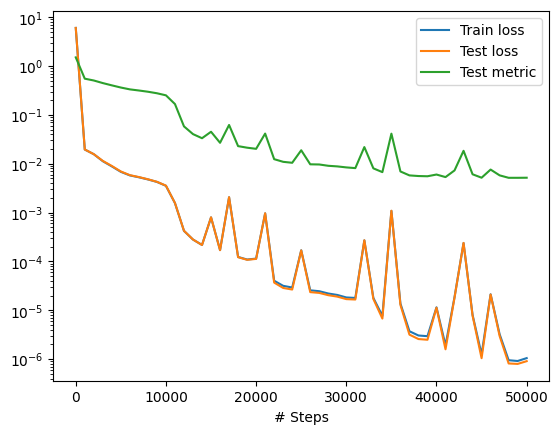

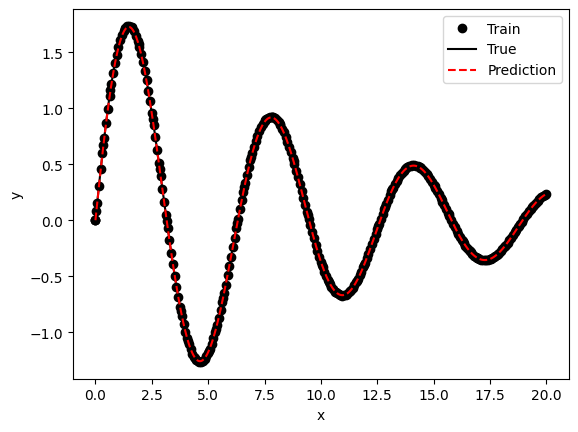

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


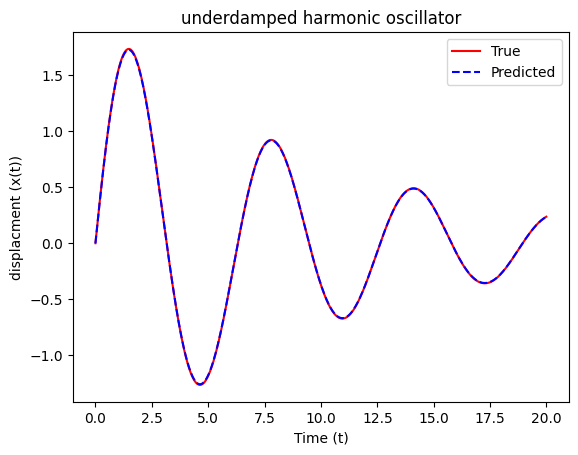

In [14]:
#code for solving underdamped harmonic oscillator when damping coefficient = 0.1 and x0 = 0
#importing required libraries
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt


w = 1
c = 0.1

# x(0) = 0 = x0, x'(0) = v0 = 2

# input the differential equation
def ode(t,x):
  dx_dt = dde.grad.jacobian(x,t)
  d2x_dt2 = dde.grad.hessian(x,t)
  return d2x_dt2 + 2*c*w* dx_dt + (w**2)*x

x0 = 0
v0 = 2
wd = ((1 - c**2) ** 0.5)* w
A = (x0**2 + ((c* w* x0 + v0)/wd)**2)**1/2

def func(t):
  return A* np.exp(-c*w*t) * np.cos(wd*t - (np.pi)/2)

# defining the boundary conditions
geom = dde.geometry.TimeDomain(0, 20)

def boundary_1(t, on_boundary):
  return on_boundary and dde.utils.isclose(t[0],0)

def bc_func1(inputs, outputs, X):
  return outputs + 1

def bc_func2(inputs, outputs, X):
  return dde.grad.jacobian(outputs, inputs, i = 0, j = None) - 2


ic1 = dde.icbc.IC(geom, lambda x: 0, lambda _, on_initial: on_initial)
ic2= dde.icbc.OperatorBC(geom, bc_func2, boundary_1)

# constructing the neural network
data = dde.data.TimePDE(geom, ode, [ic1, ic2], 300, 2, solution = func, num_test = 5000)
layer_size = [1]+ [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

# training the neural network
model = dde.Model(data, net)
model.compile(
    "adam", lr = 0.001, metrics = ["l2 relative error"], loss_weights = [1, 1, 1]
)
losshistory, train_state = model.train(iterations = 50000)

dde.saveplot(losshistory, train_state, issave = True, isplot = True)

# Load the plot generated by DeepXDE
fig, ax = plt.subplots()
dde.saveplot(losshistory, train_state, issave= True, isplot=False)

t = train_state.X_test
x_pred = train_state.y_pred_test
x_true = train_state.y_test

# Plot the predicted and true solutions
ax.plot(t, x_true, 'r-', label='True')
ax.plot(t, x_pred, 'b--', label='Predicted')

# Label the axes
ax.set_xlabel('Time (t)')
ax.set_ylabel('displacment (x(t))')
ax.set_title('underdamped harmonic oscillator')
ax.legend()










In [5]:
!pip install deepxde

enter the value of k:10
enter the value of m:10
enter the value of c:0.1
enter the value of x(0)0
enter the value of x'(0)1
Compiling model...
Building feed-forward neural network...
'build' took 0.080625 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.685906 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [3.36e-02, 0.00e+00, 1.24e+00]    [3.38e-02, 0.00e+00, 1.24e+00]    [1.15e+00]    


/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1185: ComplexWarning: Casting complex values to real discards the imaginary part
  np_val = np.asarray(subfeed_val, dtype=subfeed_dtype)


1000      [7.40e-03, 2.83e-06, 7.30e-05]    [7.34e-03, 2.83e-06, 7.30e-05]    [6.31e-01]    
2000      [3.53e-03, 3.67e-06, 3.76e-06]    [3.52e-03, 3.67e-06, 3.76e-06]    [4.87e-01]    
3000      [2.69e-03, 3.74e-07, 8.07e-06]    [2.74e-03, 3.74e-07, 8.07e-06]    [4.36e-01]    
4000      [2.17e-03, 2.25e-07, 4.89e-06]    [2.22e-03, 2.25e-07, 4.89e-06]    [3.96e-01]    
5000      [1.74e-03, 1.53e-05, 2.36e-05]    [1.76e-03, 1.53e-05, 2.36e-05]    [3.61e-01]    
6000      [1.24e-03, 1.36e-07, 1.80e-06]    [1.25e-03, 1.36e-07, 1.80e-06]    [3.10e-01]    
7000      [1.52e-03, 9.25e-05, 1.15e-04]    [1.52e-03, 9.25e-05, 1.15e-04]    [2.87e-01]    
8000      [1.01e-03, 5.83e-08, 1.08e-06]    [1.02e-03, 5.83e-08, 1.08e-06]    [2.70e-01]    
9000      [9.58e-04, 2.12e-07, 1.49e-06]    [9.67e-04, 2.12e-07, 1.49e-06]    [2.62e-01]    
10000     [8.94e-04, 4.47e-08, 9.02e-07]    [9.01e-04, 4.47e-08, 9.02e-07]    [2.52e-01]    
11000     [7.92e-04, 4.39e-08, 7.57e-07]    [7.97e-04, 4.39e-08, 7.57e

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


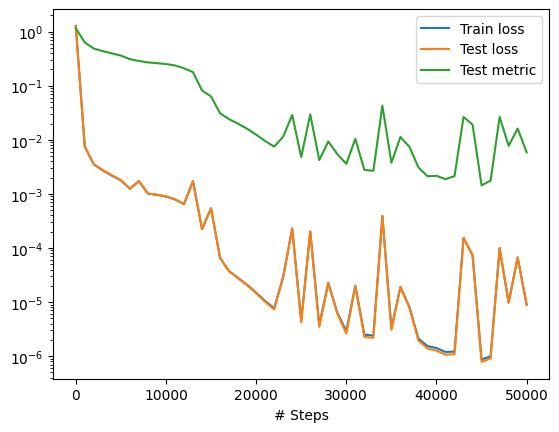

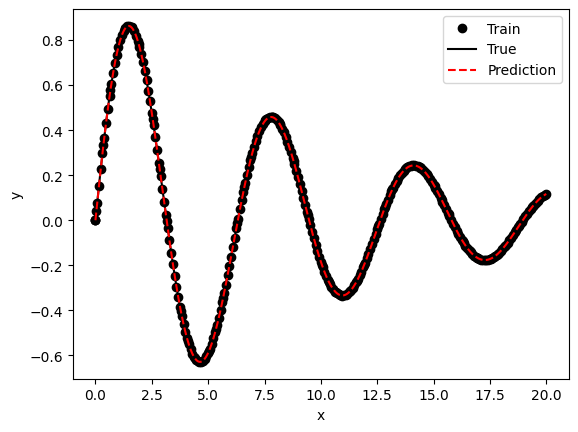

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


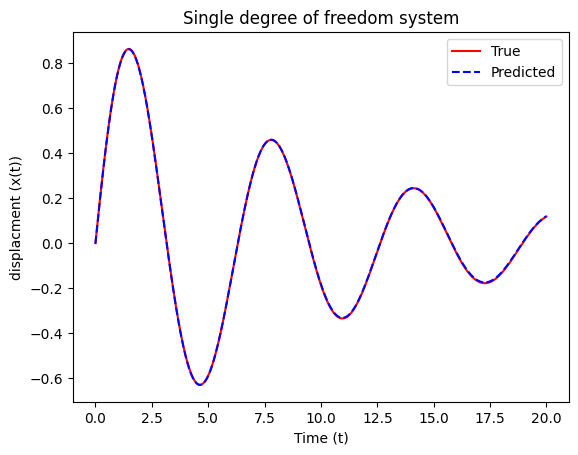

In [12]:
#code for solving single degree of freedom system using DeepXDE
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

k = float(input("enter the value of k:")) #spring constant
m = float(input("enter the value of m:")) #mass
w = (k/m)**0.5 #frequency of the oscillator
c = float(input("enter the value of c:")) #damping constant

def ode(t,x):
  dx_dt = dde.grad.jacobian(x,t)
  d2x_dt2 = dde.grad.hessian(x,t)
  return d2x_dt2 + 2*c*w* dx_dt + (w**2)*x

x0 = float(input("enter the value of x(0)")) #initial position
v0 = float(input("enter the value of x'(0)")) #initial velocity

wd = ((1 - c**2) ** 0.5)* w
s1 = -c*w + wd* 1j
s2 = -c*w - wd* 1j

def func(t):
  if s1 - s2 != 0:
     return ((-s2*x0 + v0)/(s1-s2))* np.exp(s1*t) + ((s1*x0 - v0)/(s1-s2))*np.exp(s2*t)
  else:
    return 0

geom = dde.geometry.TimeDomain(0, 20)

def boundary_1(t, on_boundary):
  return on_boundary and dde.utils.isclose(t[0],0)

def bc_func1(inputs, outputs, X):
  return outputs + x0

def bc_func2(inputs, outputs, X):
  return dde.grad.jacobian(outputs, inputs, i = 0, j = None) - v0


ic1 = dde.icbc.IC(geom, lambda x: 0, lambda _, on_initial: on_initial)
ic2= dde.icbc.OperatorBC(geom, bc_func2, boundary_1)

data = dde.data.TimePDE(geom, ode, [ic1, ic2], 300, 2, solution = func, num_test = 5000)
layer_size = [1]+ [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile(
    "adam", lr = 0.001, metrics = ["l2 relative error"], loss_weights = [1, 1, 1]
)
losshistory, train_state = model.train(iterations = 50000)

dde.saveplot(losshistory, train_state, issave = True, isplot = True )

# Load the plot generated by DeepXDE
fig, ax = plt.subplots()
dde.saveplot(losshistory, train_state, issave= True, isplot=False)

t = train_state.X_test
x_pred = train_state.y_pred_test
x_true = train_state.y_test

# Plot the predicted and true solutions
ax.plot(t, x_true, 'r-', label='True')
ax.plot(t, x_pred, 'b--', label='Predicted')

# Label the axes
ax.set_xlabel('Time (t)')
ax.set_ylabel('displacment (x(t))')
ax.set_title('Single degree of freedom system')
ax.legend()







